## The correlation between hospital beds and Covid-19 infected in global cities

##### Here, I used dataset that our team made.

#### Columns Description
* Country : Country name
* City : City name
* Area : Area of the city (km^2)
* Population : Population on 2020
* PopDensity : Population density (Population/Area)
* Hospital Beds : The number of total hospital beds in city on 2020
* Confirmed : The number of Covid-19 infected from April, 2020 to June, 2020
* Death : The number of deaths due to Covid-19 during the period
* Recovered : The number of recovered Covid-19 patients during the period
* PopDensity_auto : Population density calculated by excel function (Population/Area)

### 1. EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("datasets/global_data.csv")

In [3]:
## Looking data
data.head()

,Country,City,Area,Population,PopDensity,Hospital Beds,Confirmed,Death,Recovered,PopDensity_auto
0,US,Jackson(TN),151.0,67669.0,448.0,1178.0,26.0,0.0,0.0,448.139073
1,Spain,Murcia,886.0,459403.0,518.0,4909.0,150.0,4.0,146.0,518.513544
2,US,Jackson(MS),288.0,154340.0,536.0,4831.0,453.0,16.0,0.0,535.902778
3,US,Spartanburg,51.0,37039.0,726.0,934.0,1564.0,48.0,0.0,726.254902
4,Spain,Community_Of_Madrid,8030.0,6661949.0,829.0,20640.0,42110.0,4822.0,31406.0,829.632503


In [4]:
data.shape

(33, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          32 non-null     object 
 1   City             32 non-null     object 
 2   Area             32 non-null     float64
 3   Population       32 non-null     float64
 4   PopDensity       32 non-null     float64
 5   Hospital Beds    32 non-null     float64
 6   Confirmed        32 non-null     float64
 7   Death            32 non-null     float64
 8   Recovered        32 non-null     float64
 9   PopDensity_auto  32 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.7+ KB


In [6]:
## Drop useless row
data=data.iloc[:31,:9]

In [7]:
data['Country'].unique()

array(['US', 'Spain', 'Japan', 'Germany', 'Russia', 'Hongkong'],
      dtype=object)

There are 6 countries in this data.

In [8]:
data['City'].unique()

array(['Jackson(TN)', 'Murcia', 'Jackson(MS)', 'Spartanburg',
       'Community_Of_Madrid', 'El_paso', 'Winchester', 'San_Luis_Obispo',
       'Aichi', 'Dallas', 'Sarasota', 'Napa', 'San_Diego', 'Erie',
       'Sacramento', 'Honolulu', 'Hamburg', 'Baltimore', 'Los_Angeles',
       'Lancaster', 'York', 'Camden', 'Miami', 'Berlin',
       'Washington_D.C.', 'Philadelphia', 'Moscow', 'Tokyo', 'Hongkong',
       'Melilla', 'San_Francisco'], dtype=object)

In [9]:
## Change the name of "Community Of Madrid" into "C_Madrid"
data['City']=data['City'].replace(['Community_Of_Madrid'],'C_Madrid')

There's 32 city information in data.

In [10]:
data.describe()

,Area,Population,PopDensity,Hospital Beds,Confirmed,Death,Recovered
count,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000
mean,885.032258,2.180048e+06,2839.161290,15776.129032,16863.096774,588.806452,6469.290323
std,1690.948639,3.675859e+06,2207.666809,28111.115729,42467.909910,1190.952544,27314.110575
min,12.000000,2.831000e+04,448.000000,168.000000,23.000000,0.000000,0.000000
25%,48.500000,7.486700e+04,1301.000000,1438.000000,474.000000,11.000000,0.000000
50%,207.000000,5.253980e+05,2077.000000,4997.000000,3169.000000,94.000000,0.000000
75%,883.000000,1.718744e+06,3576.500000,12372.500000,8991.500000,389.500000,49.000000
max,8030.000000,1.395798e+07,8537.000000,128289.000000,219718.000000,4822.000000,150282.000000


### Visualization

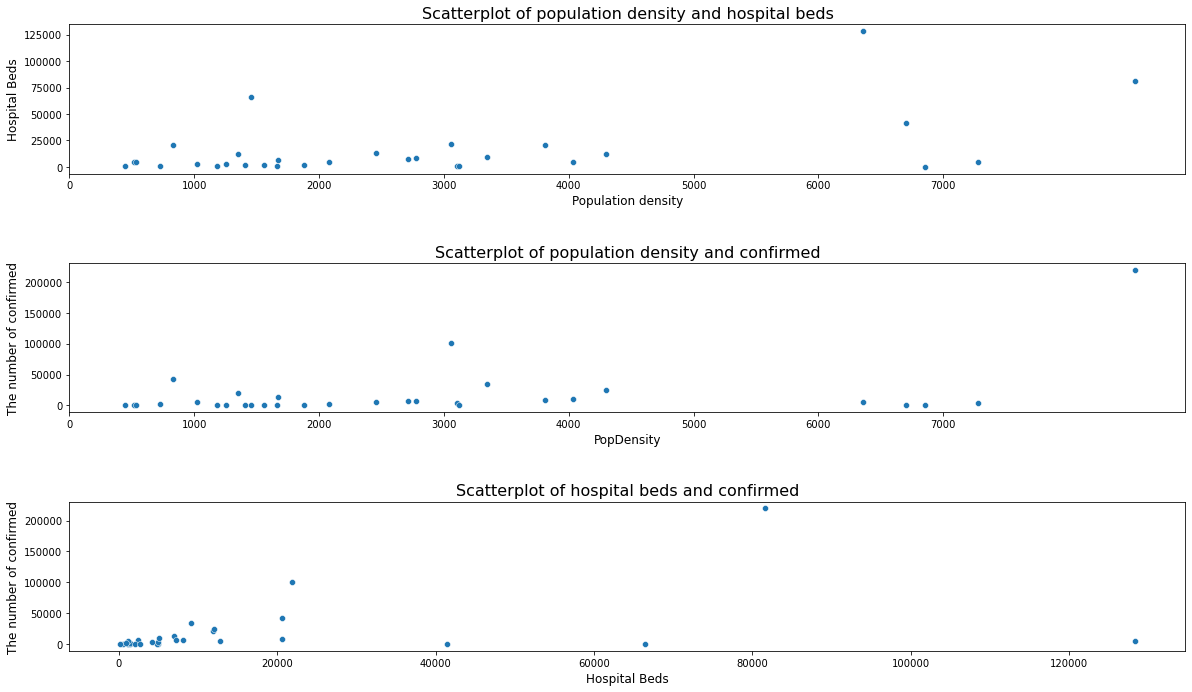

In [11]:
## Scatterplots of population density, hospital beds and the confirmed

plt.figure(figsize=(20,12))

plt.subplot(311)
g1=sns.scatterplot(x="PopDensity",y="Hospital Beds",data=data)
g1.set_xticks(range(0,8000,1000))
g1.set_xlabel("Population density",fontsize=12)
g1.set_ylabel("Hospital Beds",fontsize=12)
g1.set_title("Scatterplot of population density and hospital beds",fontsize=16)

plt.subplot(312)
g2=sns.scatterplot(x="PopDensity",y="Confirmed",data=data)
g2.set_xticks(range(0,8000,1000))
g2.set_xlabel("PopDensity",fontsize=12)
g2.set_ylabel("The number of confirmed",fontsize=12)
g2.set_title("Scatterplot of population density and confirmed",fontsize=16)

plt.subplot(313)
g3=sns.scatterplot(x="Hospital Beds",y="Confirmed",data=data)
g3.set_xlabel("Hospital Beds",fontsize=12)
g3.set_ylabel("The number of confirmed",fontsize=12)
g3.set_title("Scatterplot of hospital beds and confirmed",fontsize=16)

plt.subplots_adjust(hspace=0.6,top=0.85)
plt.show()

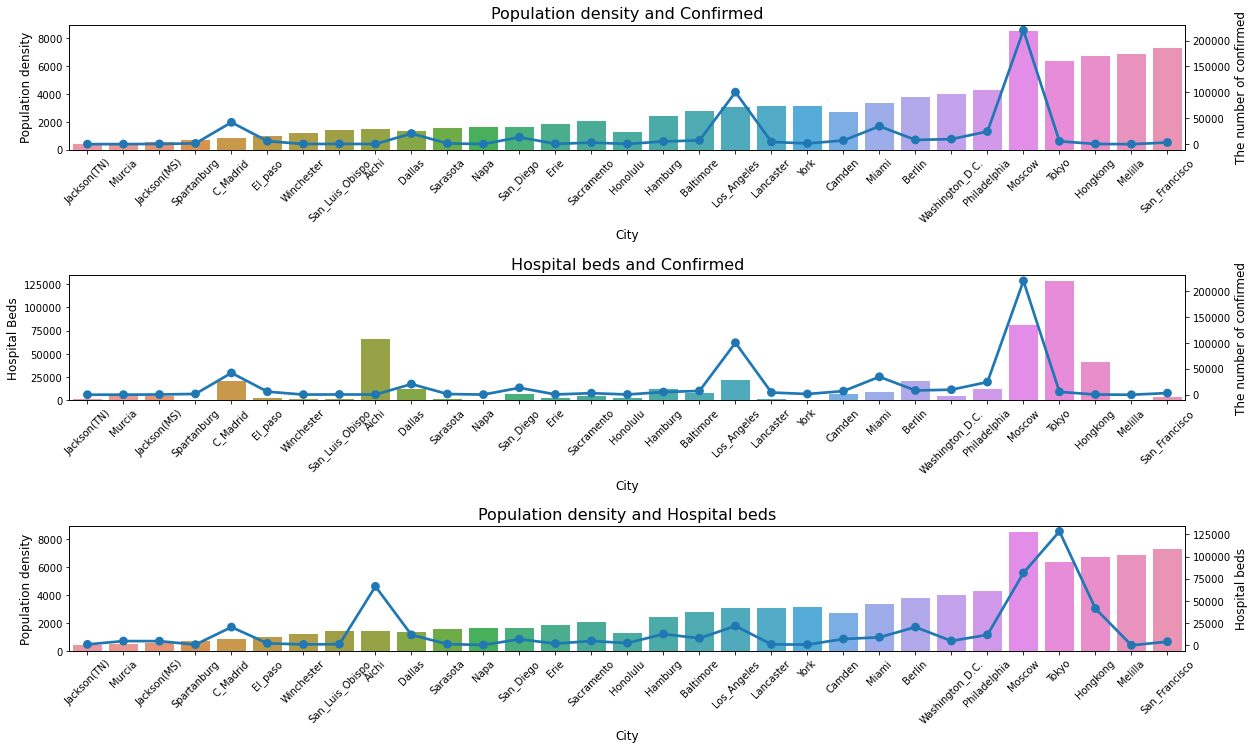

In [12]:
## Plots of cities about hospital beds, population density and confirmed

plt.figure(figsize=(20,12))

plt.subplot(311)
g1=sns.barplot(x="City",y="PopDensity",data=data)
g1.set_xlabel("City",fontsize=12)
g1.set_ylabel("Population density",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="City",y="Confirmed",data=data)
g1t.set_ylabel("The number of confirmed",fontsize=12)
g1.set_title("Population density and Confirmed",fontsize=16)

plt.subplot(312)
g2=sns.barplot(x="City",y="Hospital Beds",data=data)
g2.set_xlabel("City",fontsize=12)
g2.set_ylabel("Hospital Beds",fontsize=12)
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="City",y="Confirmed",data=data)
g2t.set_ylabel("The number of confirmed",fontsize=12)
g2.set_title("Hospital beds and Confirmed",fontsize=16)

plt.subplot(313)
g3=sns.barplot(x="City",y="PopDensity",data=data)
g3.set_xlabel("City",fontsize=12)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_ylabel("Population density",fontsize=12)
g3.set_title("Population density and Hospital beds",fontsize=16)
g3t=g3.twinx()
g3t=sns.pointplot(x="City",y="Hospital Beds",data=data)
g3t.set_ylabel("Hospital beds",fontsize=12)

plt.subplots_adjust(hspace=1.0,top=0.85)
plt.show()

* From the plot showing the hospital beds and the number of confirmed, we can't find any critial features or patterns between them. The only thing we can get is from Tokyo data, which shows that the more beds city provides, the less virus spreads. But this is only one specific case, so we can't generalize this.

* By the third plot, we can assume that there may be some correlation between the density and hospital beds.

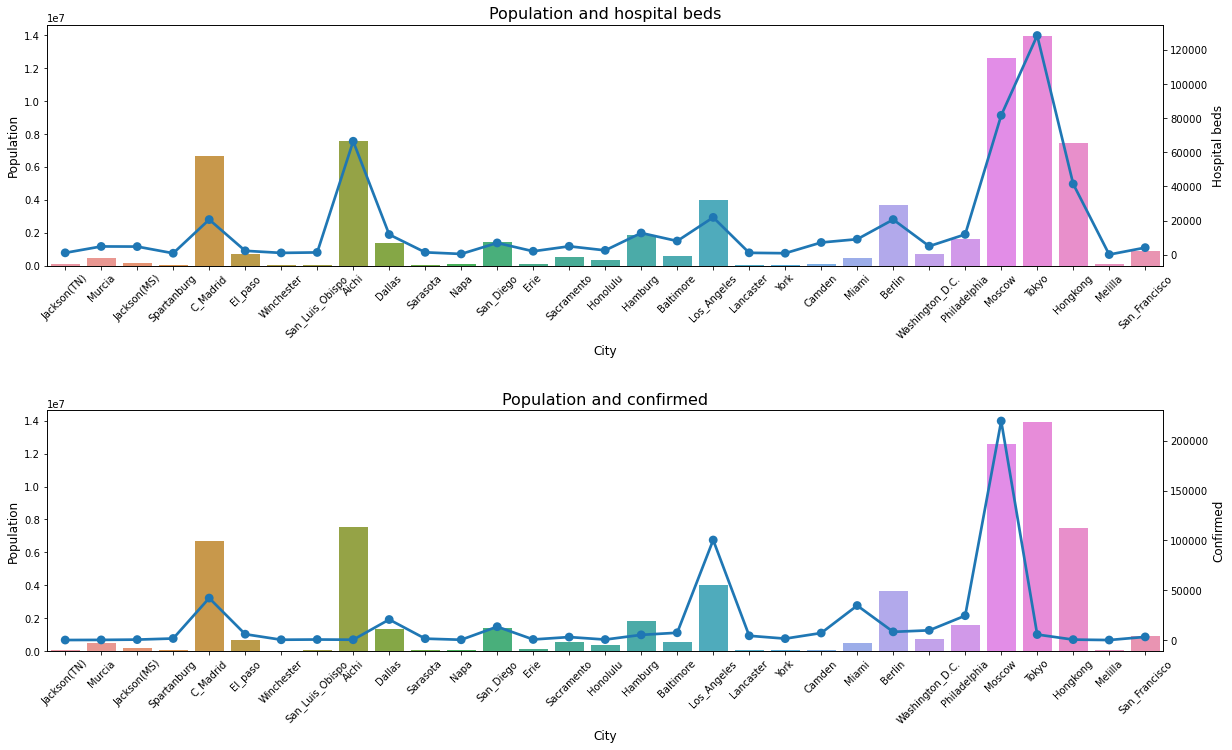

In [13]:
## Extra plot for population and hospital beds, confirmed

plt.figure(figsize=(20,12))

plt.subplot(211)
g1=sns.barplot(x="City",y="Population",data=data)
g1.set_xlabel("City",fontsize=12)
g1.set_ylabel("Population",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="City",y="Hospital Beds",data=data)
g1t.set_ylabel("Hospital beds",fontsize=12)
g1.set_title("Population and hospital beds",fontsize=16)

plt.subplot(212)
g2=sns.barplot(x="City",y="Population",data=data)
g2.set_xlabel("City",fontsize=12)
g2.set_ylabel("Population",fontsize=12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="City",y="Confirmed",data=data)
g2t.set_ylabel("Confirmed",fontsize=12)
g2.set_title("Population and confirmed",fontsize=16)

plt.subplots_adjust(hspace=0.6,top=0.85)
plt.show()

Some correlation might be exist in both of the plots. However, because there's no difference from using population density, I will use population density in modelling.

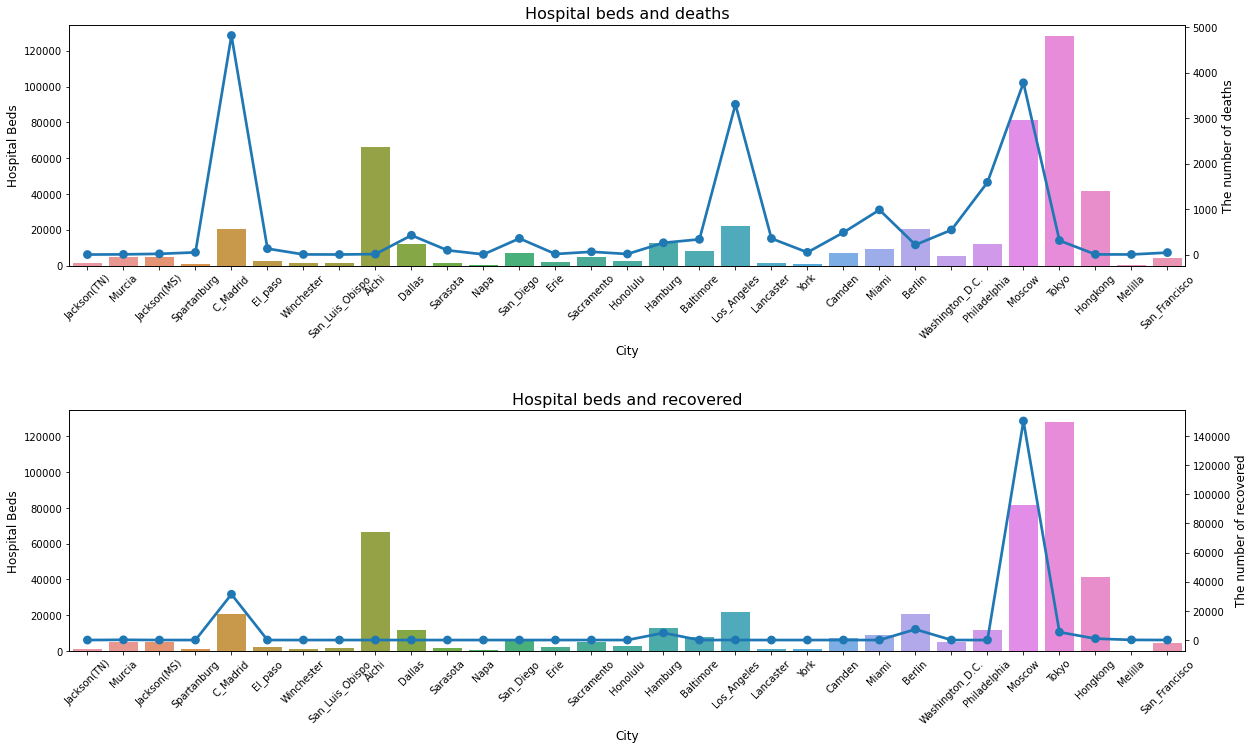

In [14]:
## Plots of cities about hospital beds and deaths or recovered

plt.figure(figsize=(20,12))

plt.subplot(211)
g1=sns.barplot(x="City",y="Hospital Beds",data=data)
g1.set_xlabel("City",fontsize=12)
g1.set_ylabel("Hospital Beds",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="City",y="Death",data=data)
g1t.set_ylabel("The number of deaths",fontsize=12)
g1.set_title("Hospital beds and deaths",fontsize=16)

plt.subplot(212)
g2=sns.barplot(x="City",y="Hospital Beds",data=data)
g2.set_xlabel("City",fontsize=12)
g2.set_ylabel("Hospital Beds",fontsize=12)
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="City",y="Recovered",data=data)
g2t.set_ylabel("The number of recovered",fontsize=12)
g2.set_title("Hospital beds and recovered",fontsize=16)

plt.subplots_adjust(hspace=0.6,top=0.85)
plt.show()

It's hard to find any patterns between hospital beds and deaths or recovered.

In [15]:
## Find correlation of hospital beds, population density and Confirmed since what we focused on this analysis is not death or recovered 
## but the number of infected

data_selected=data.iloc[:,1:7]
data_selected.corr()

,Area,Population,PopDensity,Hospital Beds,Confirmed
Area,1.000000,0.634061,-0.016546,0.493824,0.300130
Population,0.634061,1.000000,0.531534,0.954231,0.545309
PopDensity,-0.016546,0.531534,1.000000,0.502865,0.435866
Hospital Beds,0.493824,0.954231,0.502865,1.000000,0.416112
Confirmed,0.300130,0.545309,0.435866,0.416112,1.000000


By the above correlation results, we can find correlation values as below.
* Population density and confirmed : 0.44
* Hospital beds and confirmed : 0.42
* Population density and hospital beds : 0.50

There's about 0.55 correlation between population and confirmed data. Also, the most powerful correlation, about 0.95, is shown in hospital beds and population.

### Making new feature

In the correlation, I found that higher correlations are shown between population and confirmed, and between population and hospital beds. I will make new features named "Confirmed density","Hospital beds density" and "Death rate".

In [10]:
## Confirmed density
data['ConDensity']=np.round(data['Confirmed']/data['Area'],4)

In [11]:
## Hospital beds density
data['BedDensity']=np.round(data['Hospital Beds']/data['Area'],4)

In [12]:
## Death rate : (Death/Confirmed)*100
data['Death rate(%)']=np.round(data['Death']/data['Confirmed']*100,4)

In [13]:
## Confirm the dataframe
data.head()

,Country,City,Area,Population,PopDensity,Hospital Beds,Confirmed,Death,Recovered,ConDensity,BedDensity,Death rate(%)
0,US,Jackson(TN),151.0,67669.0,448.0,1178.0,26.0,0.0,0.0,0.1722,7.8013,0.0000
1,Spain,Murcia,886.0,459403.0,518.0,4909.0,150.0,4.0,146.0,0.1693,5.5406,2.6667
2,US,Jackson(MS),288.0,154340.0,536.0,4831.0,453.0,16.0,0.0,1.5729,16.7743,3.5320
3,US,Spartanburg,51.0,37039.0,726.0,934.0,1564.0,48.0,0.0,30.6667,18.3137,3.0691
4,Spain,C_Madrid,8030.0,6661949.0,829.0,20640.0,42110.0,4822.0,31406.0,5.2441,2.5704,11.4510


### Visualization of new features

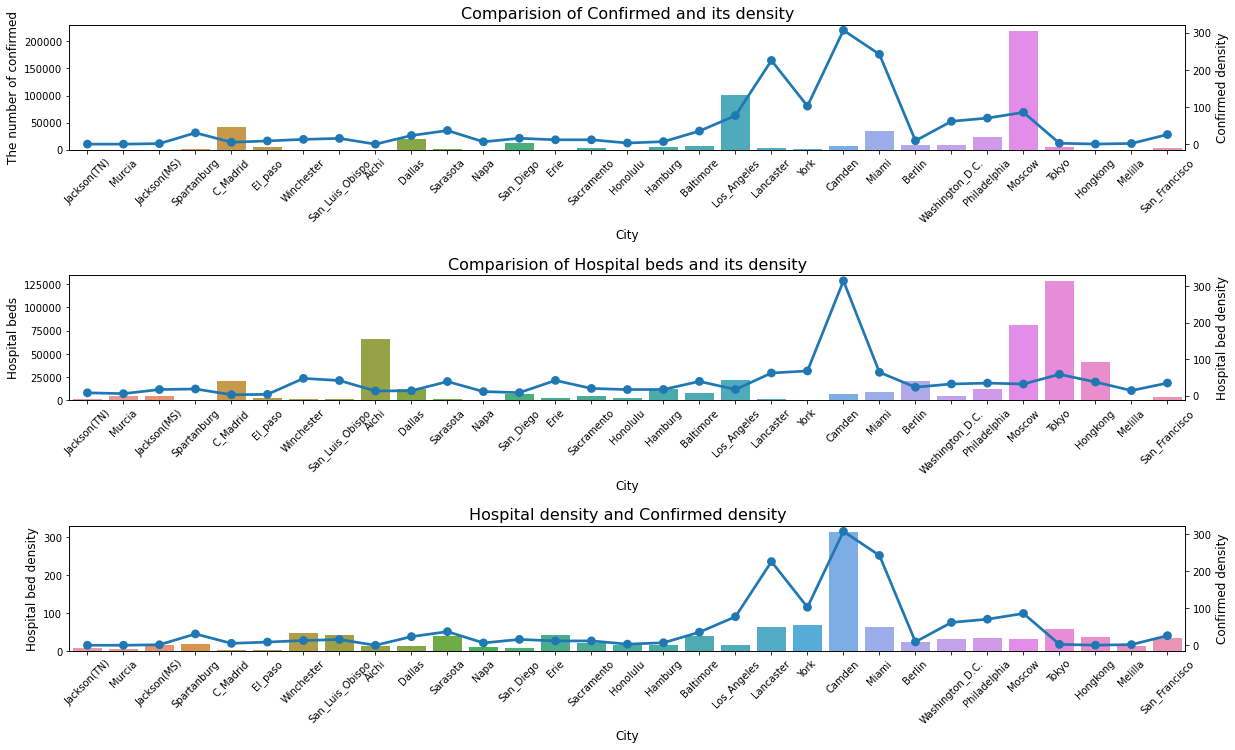

In [20]:
## Plots of population density, beds density and confirmed density by cities

plt.figure(figsize=(20,12))

plt.subplot(311)
g1=sns.barplot(x="City",y="Confirmed",data=data)
g1.set_xlabel("City",fontsize=12)
g1.set_ylabel("The number of confirmed",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="City",y="ConDensity",data=data)
g1t.set_ylabel("Confirmed density",fontsize=12)
g1.set_title("Comparision of Confirmed and its density",fontsize=16)

plt.subplot(312)
g2=sns.barplot(x="City",y="Hospital Beds",data=data)
g2.set_xlabel("City",fontsize=12)
g2.set_ylabel("Hospital beds",fontsize=12)
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="City",y="BedDensity",data=data)
g2t.set_ylabel("Hospital bed density",fontsize=12)
g2.set_title("Comparision of Hospital beds and its density",fontsize=16)

plt.subplot(313)
g3=sns.barplot(x="City",y="BedDensity",data=data)
g3.set_xlabel("City",fontsize=12)
g3.set_ylabel("Hospital bed density",fontsize=12)
g3.set_xticklabels(g1.get_xticklabels(),rotation=45)
g3t=g3.twinx()
g3t=sns.pointplot(x="City",y="ConDensity",data=data)
g3t.set_ylabel("Confirmed density",fontsize=12)
g3.set_title("Hospital density and Confirmed density",fontsize=16)

plt.subplots_adjust(hspace=1.0,top=0.85)
plt.show()

We can't find any patterns between hospital density and confirmed density by graphs.

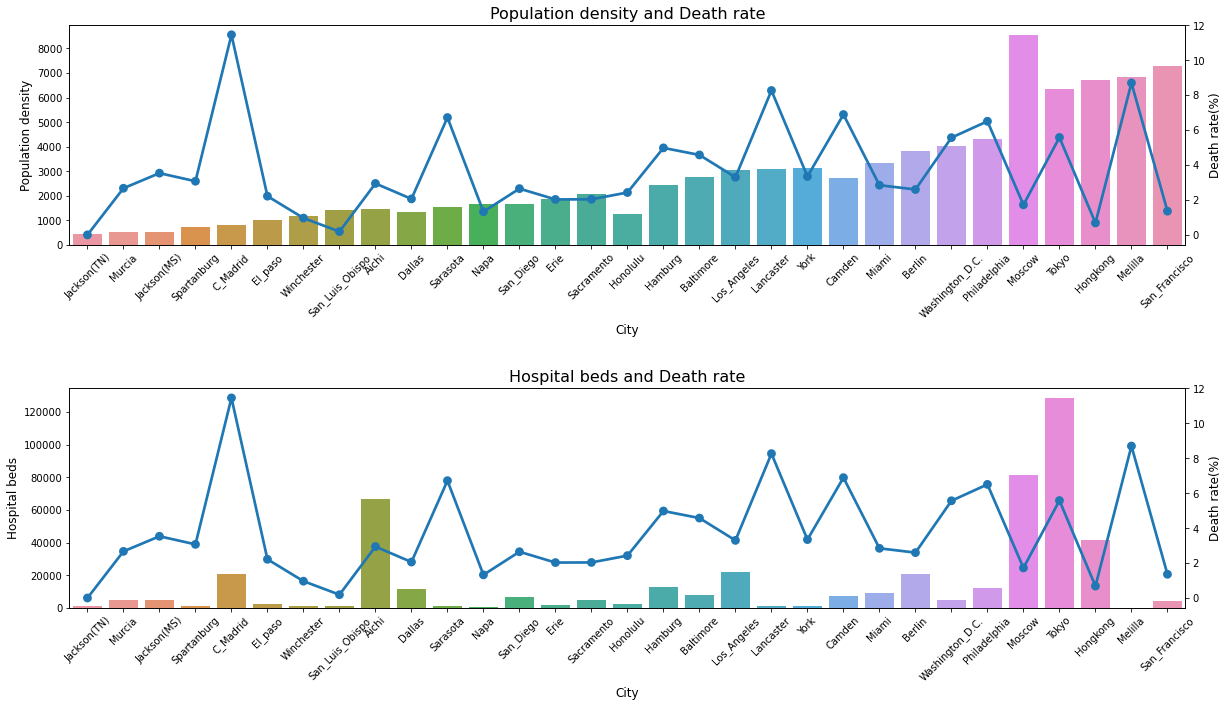

In [21]:
## Plots for death rate

plt.figure(figsize=(20,12))

plt.subplot(211)
g1=sns.barplot(x="City",y="PopDensity",data=data)
g1.set_xlabel("City",fontsize=12)
g1.set_ylabel("Population density",fontsize=12)
g1t=g1.twinx()
g1t=sns.pointplot(x="City",y="Death rate(%)",data=data)
g1t.set_ylabel("Death rate(%)",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Population density and Death rate",fontsize=16)

plt.subplot(212)
g2=sns.barplot(x="City",y="Hospital Beds",data=data)
g2.set_xlabel("City",fontsize=12)
g2.set_ylabel("Hospital beds",fontsize=12)
g2t=g2.twinx()
g2t=sns.pointplot(x="City",y="Death rate(%)",data=data)
g2t.set_ylabel("Death rate(%)",fontsize=12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Hospital beds and Death rate",fontsize=16)

plt.subplots_adjust(hspace=0.65,top=0.8)
plt.show()

There's no distinct features or patterns we can find.

In [22]:
## correlation
data.corr()

,Area,Population,PopDensity,Hospital Beds,Confirmed,Death,Recovered,ConDensity,BedDensity,Death rate(%)
Area,1.000000,0.634061,-0.016546,0.493824,0.300130,0.651214,0.348610,-0.193515,-0.191431,0.368621
Population,0.634061,1.000000,0.531534,0.954231,0.545309,0.484865,0.592044,-0.142378,-0.076560,0.074921
PopDensity,-0.016546,0.531534,1.000000,0.502865,0.435866,0.200375,0.453943,0.141732,0.117317,0.092134
Hospital Beds,0.493824,0.954231,0.502865,1.000000,0.416112,0.285526,0.464334,-0.097794,0.005085,0.032206
Confirmed,0.300130,0.545309,0.435866,0.416112,1.000000,0.766581,0.893032,0.183594,-0.043640,-0.024009
Death,0.651214,0.484865,0.200375,0.285526,0.766581,1.000000,0.621059,0.151771,-0.060903,0.383960
Recovered,0.348610,0.592044,0.453943,0.464334,0.893032,0.621059,1.000000,0.061618,-0.044212,-0.017264
ConDensity,-0.193515,-0.142378,0.141732,-0.097794,0.183594,0.151771,0.061618,1.000000,0.759161,0.298206
BedDensity,-0.191431,-0.076560,0.117317,0.005085,-0.043640,-0.060903,-0.044212,0.759161,1.000000,0.222498
Death rate(%),0.368621,0.074921,0.092134,0.032206,-0.024009,0.383960,-0.017264,0.298206,0.222498,1.000000


In [23]:
## correlation of Confirmed and the others
data.corr().loc[:,"Confirmed"]

Area             0.300130
Population       0.545309
PopDensity       0.435866
Hospital Beds    0.416112
Confirmed        1.000000
Death            0.766581
Recovered        0.893032
ConDensity       0.183594
BedDensity      -0.043640
Death rate(%)   -0.024009
Name: Confirmed, dtype: float64

The correlation value of the number of infected and bed density is -0.04, which is almost no correlation.

In [24]:
## correlation of Confirmed density and the others
data.corr().loc[:,"ConDensity"]

Area            -0.193515
Population      -0.142378
PopDensity       0.141732
Hospital Beds   -0.097794
Confirmed        0.183594
Death            0.151771
Recovered        0.061618
ConDensity       1.000000
BedDensity       0.759161
Death rate(%)    0.298206
Name: ConDensity, dtype: float64

Results
* The correlation value of Confirmed density and hospital beds is approximately -0.1, which is much lower correlation than that of hospital beds and confirmed.
* The correlation of hospital bed density and confirmed density is strongest in these variabels.

In [25]:
## correlation of Hospital beds and the others
data.corr().loc[:,"Hospital Beds"]

Area             0.493824
Population       0.954231
PopDensity       0.502865
Hospital Beds    1.000000
Confirmed        0.416112
Death            0.285526
Recovered        0.464334
ConDensity      -0.097794
BedDensity       0.005085
Death rate(%)    0.032206
Name: Hospital Beds, dtype: float64

### 2. Modelling

#### (1) The number of infected prediction

* Features : Area, Population, Population density, Hospital beds
* Target : Confirmed
* Model : Linear regression, kMeans cluster

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

def linear_reg(data,degrees):
    plt.figure(figsize=(14,5))
    y_target=data["Confirmed"]
    X_features=data.loc[:,"Area":"Hospital Beds"]
    X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=121)
    for i in range(len(degrees)):
        ax=plt.subplot(1,len(degrees),i+1)
        plt.setp(ax,xticks=(),yticks=())
        polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
        linear_regression=LinearRegression()
        pipeline=Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
        pipeline.fit(X_train,y_train)
        scores=cross_val_score(pipeline,X_train,y_train,scoring="neg_mean_squared_error",cv=3)
        rmse=np.round(np.sqrt(-1*np.mean(scores)),4)
        coefficients=pipeline.named_steps['linear_regression'].coef_
        intercept=pipeline.named_steps['linear_regression'].intercept_
        print("\nDegree {0}".format(degrees[i]))
        print("\nIntercept | {}".format(np.round(intercept,4)))
        print("\ncoefficients | {0}".format(np.round(coefficients,4)))
        print("\nRMSE | {0}\n".format(rmse))
        print("="*80)
        plt.plot(X_test["PopDensity"],pipeline.predict(X_test),label="Model",color="black")
        plt.scatter(X_test["PopDensity"],y_test,color="red",label="Real values")
        plt.title("Degree{}\nRMSE : {}".format(i+1,rmse))
    plt.show()


Degree 1

Intercept | 9021.9784

coefficients | [-1.4394  0.011  -0.9236 -1.147 ]

RMSE | 59460.132


Degree 2

Intercept | -8822.6028

coefficients | [ 8.62759e+01 -3.76000e-02  4.05990e+00  3.76460e+00 -8.86000e-02
  2.00000e-04 -5.73000e-02 -9.40000e-03 -0.00000e+00  0.00000e+00
  0.00000e+00 -4.00000e-04  8.00000e-04 -7.00000e-04]

RMSE | 4446125.9903


Degree 3

Intercept | 2596.8939

coefficients | [-0.      0.     -0.      0.      0.      0.0002  0.      0.      0.
 -0.0004 -0.0008 -0.0011 -0.0003 -0.0005  0.0015 -0.     -0.     -0.0004
 -0.     -0.      0.      0.0004  0.0008  0.     -0.     -0.      0.
  0.      0.     -0.     -0.      0.     -0.      0.    ]

RMSE | 574178909.02



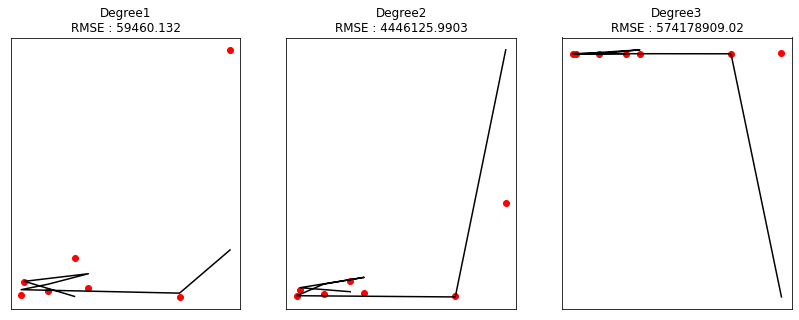

In [42]:
## No clustering
linear_reg(data,[1,2,3])

It's best to choose degree to be 1, which means we can predict just by linear regression model.

In [28]:
## Making Prediction model

y_target=data["Confirmed"]
X_features=data.loc[:,"Area":"Hospital Beds"]
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=121)
    
linear=LinearRegression()
linear.fit(X_train,y_train)
coefficients=pd.Series(data=np.round(linear.coef_,4),index=X_train.columns)
coefficients.sort_values(ascending=False)

Population       0.0110
PopDensity      -0.9236
Hospital Beds   -1.1470
Area            -1.4394
dtype: float64

In [43]:
def no_clustering_infected_prediction(area,population,popdensity,beds):
    prediction=9021.9784+0.0110*population-0.9236*popdensity-1.1470*beds-1.4394*area
    return prediction

**What if split train,test set by "PopDensity"**

In [14]:
## clustering
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists,X_features):
    n_cols=len(cluster_lists)
    fig,axs=plt.subplots(figsize=(4*n_cols,4),nrows=1,ncols=n_cols)
    
    for ind,n_cluster in enumerate(cluster_lists):
        clusterer=KMeans(n_clusters=n_cluster,max_iter=500,random_state=144)
        cluster_labels=clusterer.fit_predict(X_features)
        sil_avg=silhouette_score(X_features,cluster_labels)
        sil_values=silhouette_samples(X_features,cluster_labels)
        y_lower=10
        axs[ind].set_title("Number of Cluster: "+str(n_cluster)+"\nSilhouette Score: "+str(np.round(sil_avg,3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1,1])
        axs[ind].set_ylim([0,len(X_features)+(n_cluster+1)*10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0,0.2,0.4,0.6,0.8,1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values=sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i=ith_cluster_sil_values.shape[0]
            y_upper=y_lower+size_cluster_i
            color=cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_sil_values,facecolor=color,edgecolor=color,alpha=0.7)
            axs[ind].text(-0.05,y_lower+0.5*size_cluster_i,str(i))
            y_lower=y_upper+10
        axs[ind].axvline(x=sil_avg,color="red",linestyle="--")

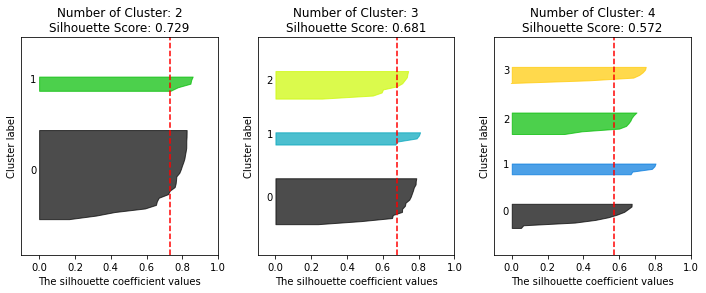

In [31]:
X=data[['PopDensity']]
visualize_silhouette([2,3,4],X)

The best n_cluster is 2, since its silhouette score is highest. However, because of my worry that clustering the data into two wouldn't be much useful, I'll graph the results of both clustering into 2 and 3 respectively.

In [15]:
def linear_reg_stratify(data,degrees,col):
    plt.figure(figsize=(14,5))
    y_target=data["Confirmed"]
    X_features=data.loc[:,"Area":"Hospital Beds"]
    X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=121,stratify=data[col])
    for i in range(len(degrees)):
        ax=plt.subplot(1,len(degrees),i+1)
        plt.setp(ax,xticks=(),yticks=())
        polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
        linear_regression=LinearRegression()
        pipeline=Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
        pipeline.fit(X_train,y_train)
        scores=cross_val_score(pipeline,X_train,y_train,scoring="neg_mean_squared_error",cv=3)
        rmse=np.round(np.sqrt(-1*np.mean(scores)),4)
        coefficients=pipeline.named_steps['linear_regression'].coef_
        intercept=pipeline.named_steps['linear_regression'].intercept_
        print("\nDegree {0}".format(degrees[i]))
        print("\nIntercept | {}".format(np.round(intercept,4)))
        print("\ncoefficients | {0}".format(np.round(coefficients,4)))
        print("\nRMSE | {0}\n".format(rmse))
        print("="*80)
        plt.plot(X_test["PopDensity"],pipeline.predict(X_test),label="Model",color="black")
        plt.scatter(X_test["PopDensity"],y_test,color="red",label="Real values")
        plt.title("Degree{}\nRMSE : {}".format(i+1,rmse))
    plt.show()

In [33]:
# Clustering (n_clusters=2)

cluster_labels=KMeans(n_clusters=2,init='k-means++',max_iter=300,random_state=144).fit_predict(X)
data["cluster"]=cluster_labels

In [34]:
data[["cluster"]].value_counts()

cluster
0          26
1           5
dtype: int64

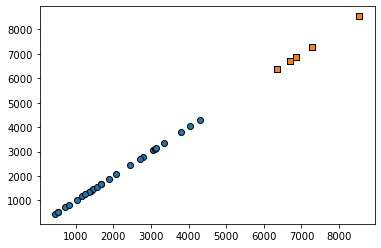

In [35]:
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster=data[data['cluster']==label]
    plt.scatter(x=label_cluster['PopDensity'],y=label_cluster['PopDensity'],edgecolor='k',marker=markers[label])

plt.show()


Degree 1

Intercept | 8746.5626

coefficients | [ 0.5407  0.0083 -1.1299 -0.8532]

RMSE | 72030.7379


Degree 2

Intercept | -5002.9818

coefficients | [ 1.437543e+02 -3.990000e-02  5.179900e+00 -4.724200e+00 -1.210000e-01
  2.000000e-04 -9.580000e-02 -5.000000e-04 -0.000000e+00 -0.000000e+00
  0.000000e+00 -5.000000e-04  4.400000e-03 -5.000000e-04]

RMSE | 3352912.2819


Degree 3

Intercept | 1402.1376

coefficients | [-0.      0.     -0.     -0.     -0.      0.0005  0.      0.      0.
  0.0002 -0.0007 -0.0006 -0.0001 -0.0001 -0.0008  0.      0.0007 -0.0004
 -0.     -0.      0.     -0.0001  0.0008 -0.0001  0.      0.     -0.
 -0.      0.      0.      0.      0.     -0.     -0.    ]

RMSE | 21423882.358



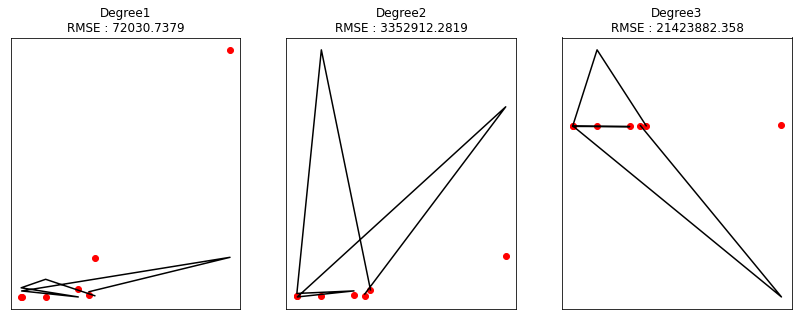

In [36]:
linear_reg_stratify(data,[1,2,3],"cluster")

In [37]:
data['cluster'].unique()

array([0, 1])

In [38]:
## Clustering (n_clusters=3)
cluster_labels=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=144).fit_predict(X)
data["cluster"]=cluster_labels

In [39]:
data[['cluster']].value_counts()

cluster
0          16
2          10
1           5
dtype: int64

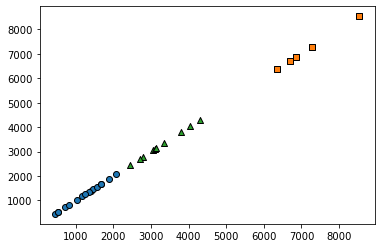

In [40]:
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster=data[data['cluster']==label]
    plt.scatter(x=label_cluster['PopDensity'],y=label_cluster['PopDensity'],edgecolor='k',marker=markers[label])

plt.show()

Though clustering into 2 gives us the most distinct groups, the result of n_clusters=3 is not that bad. I'll use both results as stratify value in train_test_split.


Degree 1

Intercept | 5281.8351

coefficients | [-3.40555e+01  6.50000e-03 -2.12440e+00  2.25000e+00]

RMSE | 100658.171


Degree 2

Intercept | 265.2257

coefficients | [ 1.790325e+02 -4.060000e-02 -7.177100e+00 -4.980200e+00 -1.379000e-01
  1.000000e-04 -9.020000e-02  1.270000e-02 -0.000000e+00 -0.000000e+00
  0.000000e+00  1.400000e-03  9.100000e-03 -2.400000e-03]

RMSE | 536270.0595


Degree 3

Intercept | 2185.0432

coefficients | [-0.0001  0.     -0.      0.     -0.     -0.0002  0.      0.      0.
 -0.0002 -0.0008 -0.0005 -0.0001 -0.0002  0.0002  0.     -0.0002 -0.0001
 -0.     -0.      0.      0.0002  0.0009 -0.0001  0.     -0.      0.
  0.      0.     -0.     -0.      0.     -0.      0.    ]

RMSE | 403480200.8402



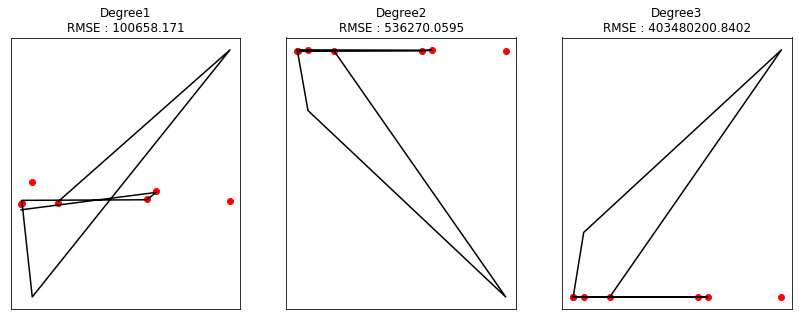

In [107]:
linear_reg_stratify(data,[1,2,3],'cluster')

When there's no clustering, the smallest RMSE value was 59460.132. Because the values of RMSE of both n_clusters=2 and 3 are much higher than that, the most suitable linear regression on predicting the number of infected would be the one without any clustering.

**What if split train,test set by "Population"**

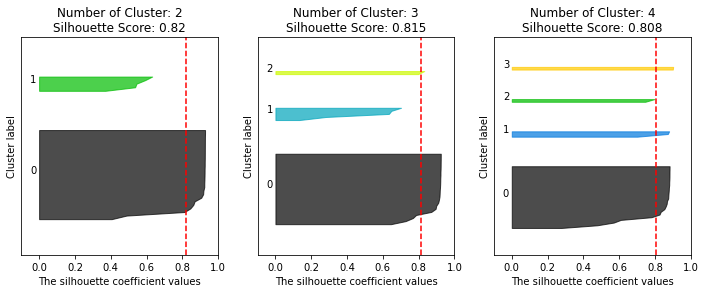

In [90]:
X=data[['Population']]
visualize_silhouette([2,3,4],X)

Though the silhouette score of n_clusters=2 is highest, the silhouette coefficient values in n_clusters=4 are the least distant from the average value. So we will use n_clusters=4 in this trial.

In [94]:
cluster_labels=KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=144).fit_predict(X)
data["cluster_population"]=cluster_labels

In [95]:
data[["cluster_population"]].value_counts()

cluster_population
0                     24
1                      3
3                      2
2                      2
dtype: int64

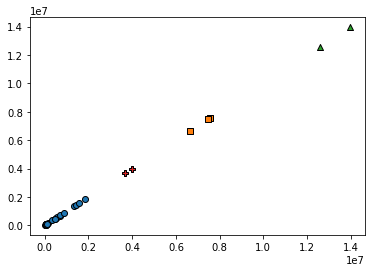

In [97]:
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster=data[data['cluster_population']==label]
    plt.scatter(x=label_cluster['Population'],y=label_cluster['Population'],edgecolor='k',marker=markers[label])

plt.show()


Degree 1

Intercept | -12170.8704

coefficients | [13.0771 -0.0249  0.3797  5.8695]

RMSE | 84850.7378


Degree 2

Intercept | 1260.3172

coefficients | [ 9.28813e+01 -4.89000e-02 -3.29330e+00 -2.53010e+00 -6.66000e-02
  0.00000e+00 -3.83000e-02  1.22000e-02 -0.00000e+00 -0.00000e+00
  0.00000e+00  7.00000e-04  5.10000e-03 -1.30000e-03]

RMSE | 1093854.1811


Degree 3

Intercept | 2289.2302

coefficients | [ 0.      0.     -0.     -0.     -0.      0.      0.     -0.      0.
 -0.0004 -0.0003 -0.0006 -0.0002 -0.0001 -0.0013  0.      0.     -0.0001
 -0.     -0.     -0.      0.0004  0.0004 -0.     -0.     -0.      0.
  0.      0.     -0.     -0.      0.     -0.      0.    ]

RMSE | 220991300.6518



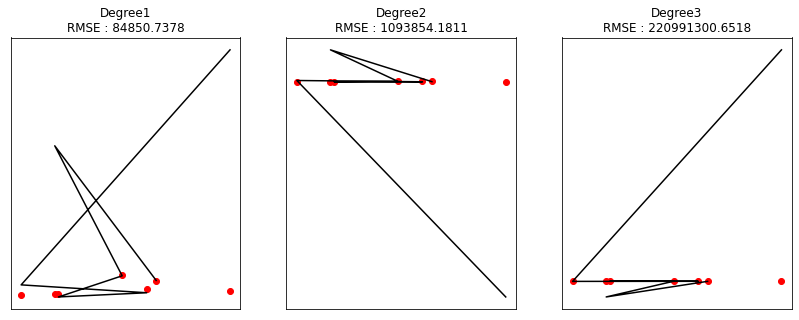

In [109]:
linear_reg_stratify(data,[1,2,3],'cluster_population')

It only makes RMSE worse.

**What if train,test split with hospital beds**

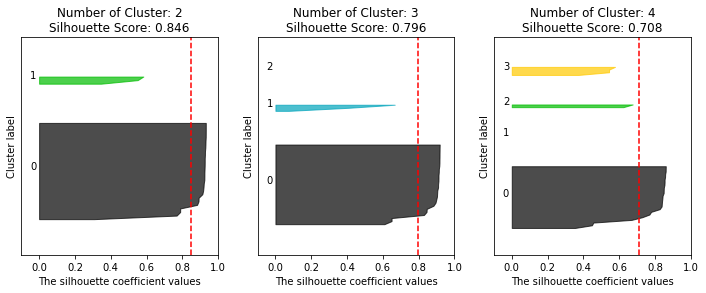

In [17]:
X=data[['Hospital Beds']]
visualize_silhouette([2,3,4],X)

It's better not to use this clustering.

## At the end of this analysis...
As I searched for some previous reports about covid-19 infected prediction, I found that most of them uses confirmed data more than two weeks. My team decided to follow the same process to have better precision in our model. However, because there are some cities that we can't find the whole confirmed datasets, I change subjected cities into states in U.S. i will proceed analysis in another notebook called "US_state_hospitalbeds".